In [3]:
from pandas import*
from datetime import datetime
from numpy import*
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from matplotlib import style
import matplotlib.dates as mdates
import plotly
import cufflinks as cf
cf.go_offline
from matplotlib.ticker import MaxNLocator
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
#import rfpimp 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

In [4]:
df = read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
df['title'].nunique()

148

In [8]:
x= df['title'].iloc[0]


In [9]:
df['Reason']= df['title'].apply(lambda title: title.split(":")[0])

In [10]:
reason= df['Reason'].value_counts()

<AxesSubplot:xlabel='Reason', ylabel='count'>

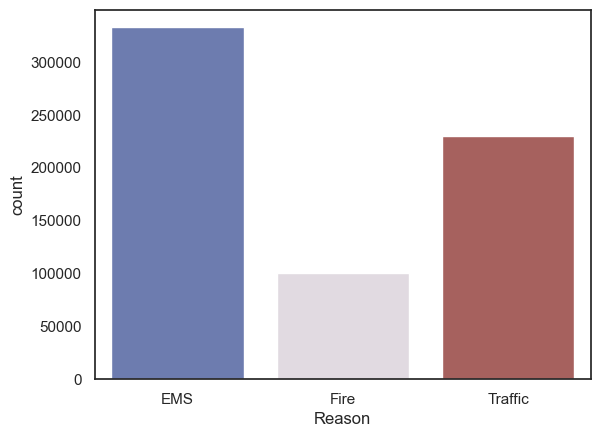

In [11]:
sns.countplot(x= "Reason",
              data= df,
              palette = "twilight_shifted")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [13]:
df['timeStamp']= to_datetime(df['timeStamp'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   Reason     663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 50.6+ MB


In [15]:
time = df['timeStamp'].iloc[0]
time.minute

10

In [16]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Year']=df['timeStamp'].apply(lambda time: time.year)
df['DOW']=df['timeStamp'].dt.day_name()


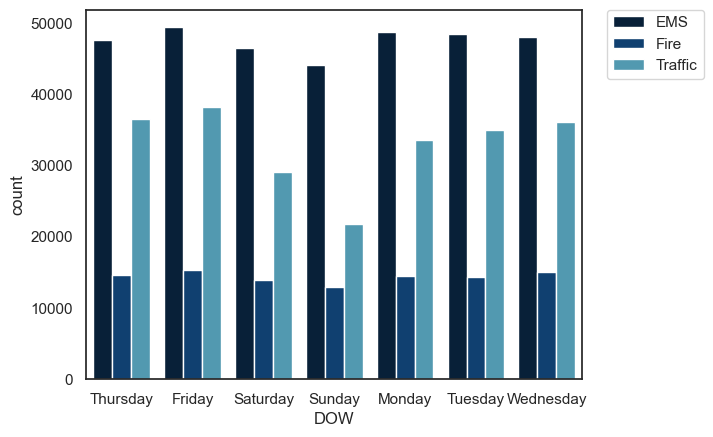

In [17]:
sns.countplot(x= 'DOW',
              data= df,
              hue= 'Reason',
              palette ="ocean"
             )
plt.legend(bbox_to_anchor= (1.05,1), 
           loc =2,
           borderaxespad=0)

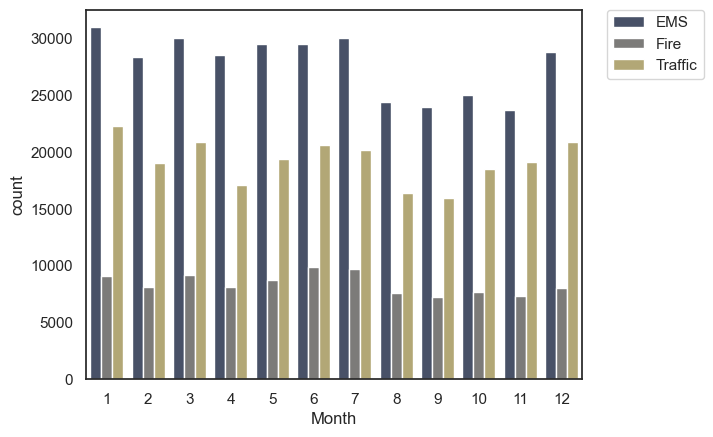

In [18]:
sns.countplot(x= 'Month',
              data= df,
              hue= 'Reason',
              palette ="cividis"
             )
plt.legend(bbox_to_anchor= (1.05,1), 
           loc =2,
           borderaxespad=0)

In [19]:
grouped= df.groupby('Month').count()

In [20]:
del grouped['addr']
grouped

,lat,lng,desc,zip,title,timeStamp,twp,e,Reason,Hour,Year,DOW
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


In [21]:
plt.figure(figsize= (8,5))
grouped['twp'].iplot()

KeyboardInterrupt: 

<Figure size 800x500 with 0 Axes>

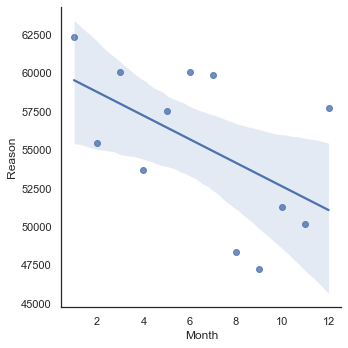

In [ ]:
sns.lmplot(x= "Month", y= "Reason", data=grouped.reset_index())

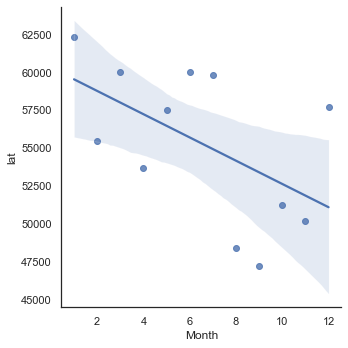

In [ ]:
sns.lmplot(x= "Month", y= "lat", data=grouped.reset_index())

In [ ]:
df["Date"] = df['timeStamp'].dt.date

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Year,DOW,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,2015,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,2015,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,2015,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,2015,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,2015,Thursday,2015-12-10


In [ ]:
ddf= df[df["Year"] == 2016]

In [ ]:
ddf

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Year,DOW,Date
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,2016,Friday,2016-01-01
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,2016,Friday,2016-01-01
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,2016,Friday,2016-01-01
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,0,1,2016,Friday,2016-01-01
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,0,1,2016,Friday,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150271,40.076383,-75.303797,FAYETTE ST & E 4TH AVE; CONSHOHOCKEN; Station...,19428.0,EMS: RESPIRATORY EMERGENCY,2016-12-31 23:22:07,CONSHOHOCKEN,FAYETTE ST & E 4TH AVE,1,EMS,23,12,2016,Saturday,2016-12-31
150272,40.296788,-75.450413,CHURCH RD & QUARRY RD; UPPER SALFORD; Station...,19438.0,EMS: SUBJECT IN PAIN,2016-12-31 23:29:04,UPPER SALFORD,CHURCH RD & QUARRY RD,1,EMS,23,12,2016,Saturday,2016-12-31
150273,40.121899,-75.288641,W GERMANTOWN PIKE & WALTON RD; PLYMOUTH; 2016-...,19462.0,Traffic: DISABLED VEHICLE -,2016-12-31 23:35:28,PLYMOUTH,W GERMANTOWN PIKE & WALTON RD,1,Traffic,23,12,2016,Saturday,2016-12-31
150274,40.110192,-75.259927,LORINE LN & CAMBURN RD; WHITEMARSH; Station 3...,19462.0,EMS: OVERDOSE,2016-12-31 23:45:47,WHITEMARSH,LORINE LN & CAMBURN RD,1,EMS,23,12,2016,Saturday,2016-12-31


In [ ]:
dates=ddf.groupby('Date').count()
dates.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Year,DOW
Date,,,,,,,,,,,,,,
2016-01-01,262,262,262,236,262,262,262,262,262,262,262,262,262,262
2016-01-02,334,334,334,300,334,334,333,334,334,334,334,334,334,334
2016-01-03,322,322,322,284,322,322,322,322,322,322,322,322,322,322
2016-01-04,401,401,401,345,401,401,401,401,401,401,401,401,401,401
2016-01-05,445,445,445,373,445,445,445,445,445,445,445,445,445,445


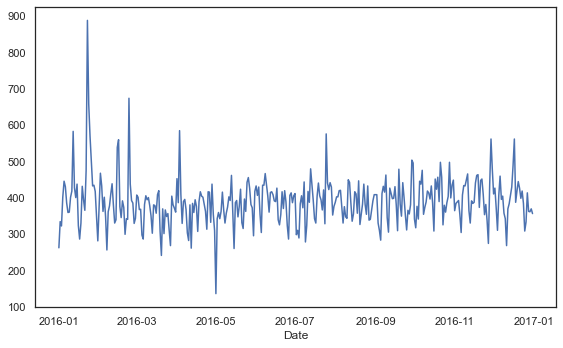

In [ ]:
plt.figure(figsize= (8,5))
dates['lat'].plot()
plt.tight_layout()

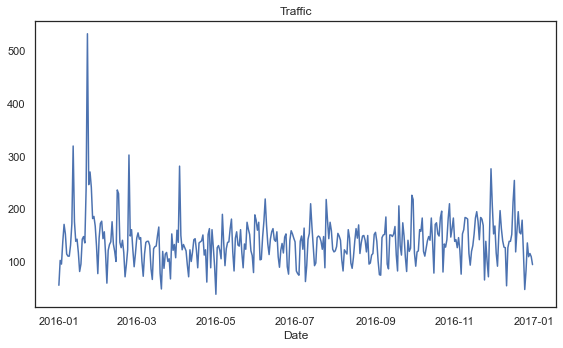

In [ ]:
plt.figure(figsize= (8,5))
ddf[ddf["Reason"]=="Traffic"].groupby('Date').count()['lat'].plot()
plt.title("Traffic")
plt.tight_layout()

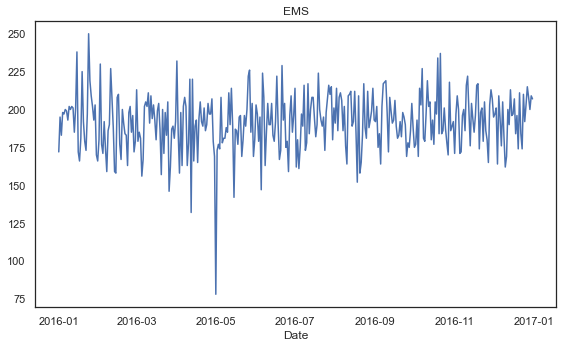

In [ ]:
plt.figure(figsize= (8,5))
ddf[ddf["Reason"]=="EMS"].groupby('Date').count()['lat'].plot()
plt.title("EMS")
plt.tight_layout()

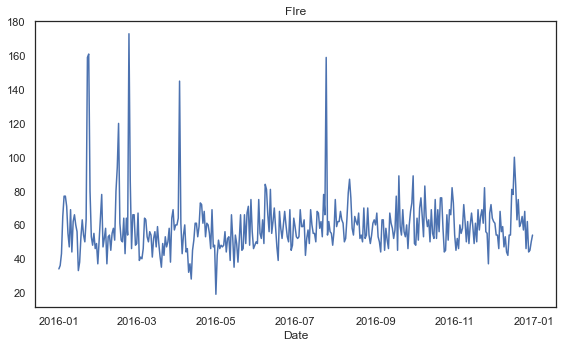

In [ ]:
plt.figure(figsize= (8,5))
ddf[ddf["Reason"]=="Fire"].groupby('Date').count()['lat'].plot()
plt.title("FIre")
plt.tight_layout()

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142360 entries, 7916 to 150275
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        142360 non-null  float64       
 1   lng        142360 non-null  float64       
 2   desc       142360 non-null  object        
 3   zip        124495 non-null  float64       
 4   title      142360 non-null  object        
 5   timeStamp  142360 non-null  datetime64[ns]
 6   twp        142317 non-null  object        
 7   addr       142360 non-null  object        
 8   e          142360 non-null  int64         
 9   Reason     142360 non-null  object        
 10  Hour       142360 non-null  int64         
 11  Month      142360 non-null  int64         
 12  Year       142360 non-null  int64         
 13  DOW        142360 non-null  object        
 14  Date       142360 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usag

In [ ]:
unstacked= ddf.groupby(by = ["DOW", "Hour"]).count()['Reason'].unstack()
unstacked

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DOW,,,,,,,,,,,,,,,,,,,,,
Friday,385,345,307,286,268,324,608,950,1075,1159,...,1323,1455,1514,1482,1146,1073,953,859,783,652
Monday,382,291,284,253,298,349,566,952,1212,1163,...,1216,1328,1373,1390,1201,1019,859,659,607,438
Saturday,542,453,383,367,344,353,391,547,716,974,...,1154,1154,1147,1154,1060,1044,896,794,711,681
Sunday,512,451,411,383,315,341,380,542,661,872,...,990,978,961,1013,990,937,737,662,536,488
Thursday,397,284,308,234,256,333,563,973,1161,1237,...,1244,1380,1330,1487,1169,1016,857,764,606,485
Tuesday,377,314,275,237,274,351,583,980,1223,1217,...,1316,1337,1472,1472,1270,969,881,749,567,419
Wednesday,372,307,247,280,233,341,599,1031,1186,1147,...,1305,1349,1432,1453,1235,994,909,750,610,478


<AxesSubplot:xlabel='Hour', ylabel='DOW'>

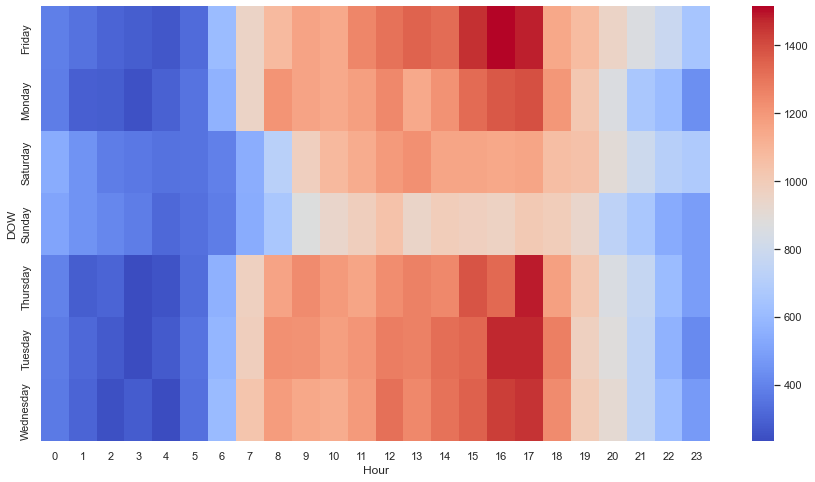

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(unstacked, cmap= "coolwarm")

<Figure size 1080x576 with 0 Axes>

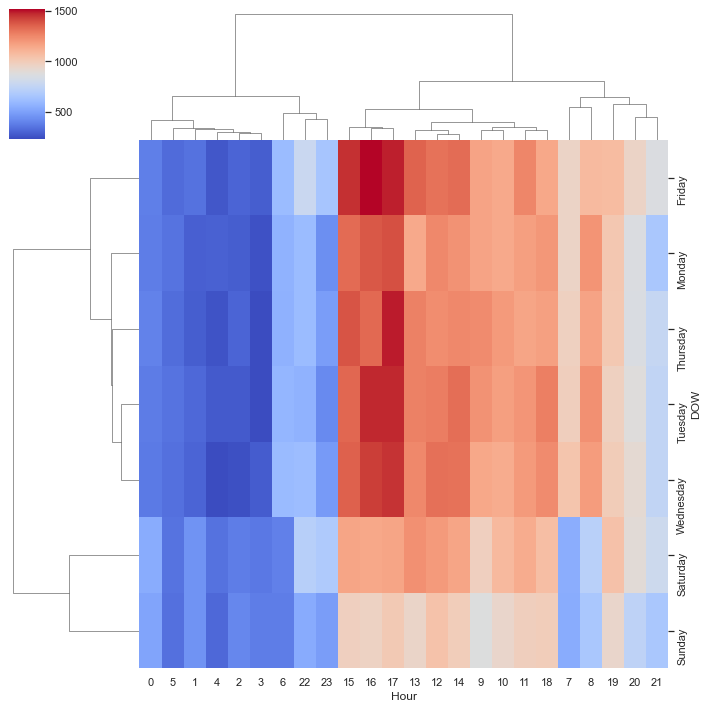

In [ ]:
plt.figure(figsize= (15,8))
sns.clustermap(unstacked, cmap= "coolwarm")

In [ ]:
month_stacked= ddf.groupby(by = ["DOW", "Month"]).count()['Reason'].unstack()
month_stacked

Month,1,2,3,4,5,6,7,8,9,10,11,12
DOW,,,,,,,,,,,,
Friday,1950,1564,1521,1949,1725,1647,2042,1740,2195,1901,1699,2058
Monday,1718,1959,1534,1594,1776,1609,1685,1865,1552,2042,1682,1526
Saturday,2253,1435,1264,1736,1438,1376,1691,1423,1406,1935,1516,2015
Sunday,1947,1223,1097,1486,1413,1329,1667,1360,1235,1757,1281,1273
Thursday,1584,1582,1883,1592,1585,2055,1642,1579,2165,1625,1630,2002
Tuesday,1961,1743,1871,1421,1904,1671,1650,1993,1559,1542,2193,1699
Wednesday,1683,1890,1889,1509,1533,2045,1711,1944,1557,1700,2090,1589


<AxesSubplot:xlabel='Month', ylabel='DOW'>

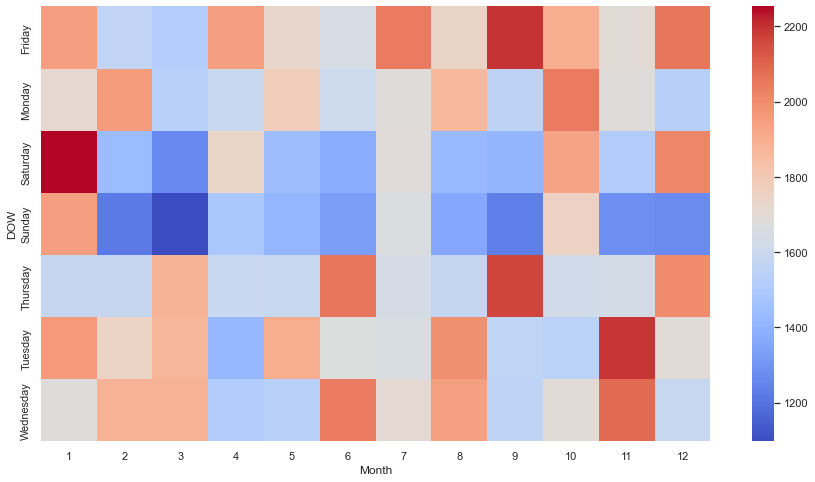

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(month_stacked,cmap= "coolwarm")

<Figure size 1080x576 with 0 Axes>

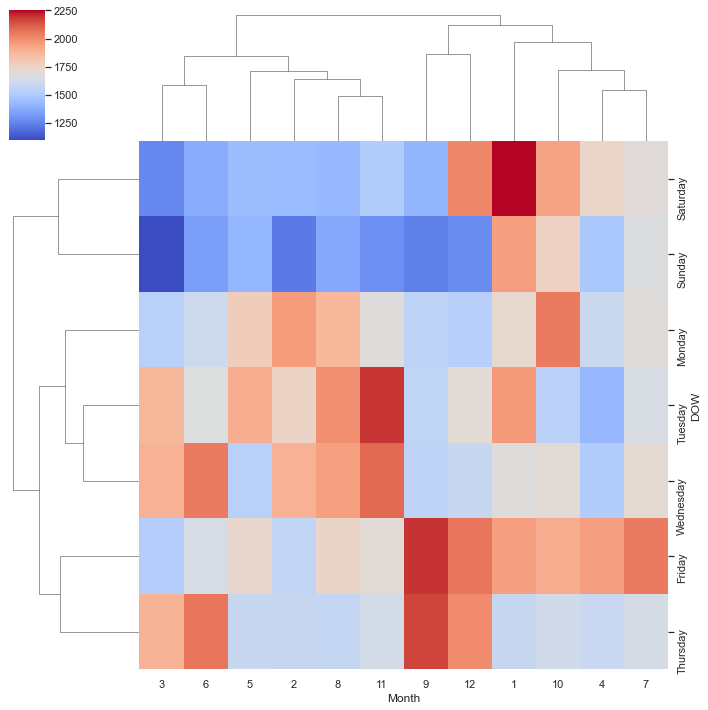

In [ ]:
plt.figure(figsize= (15,8))
sns.clustermap(month_stacked,cmap= "coolwarm")

,Hour,Season,Month,Temperature,PV_penetration,Total_PV_pu,Total_PV_W,Net Power_pu
0,0.0,Winter,January,-9,0,0.0,0.0,0.15
1,0.5,Winter,January,-9,0,0.0,0.0,0.08
2,1.0,Winter,January,-9,0,0.0,0.0,0.10
3,1.5,Winter,January,-8,0,0.0,0.0,0.12
4,2.0,Winter,January,-8,0,0.0,0.0,0.12
...,...,...,...,...,...,...,...,...
6331,21.5,Winter,December,0,100,0.0,0.0,0.41
6332,22.0,Winter,December,0,100,0.0,0.0,0.30
6333,22.5,Winter,December,-1,100,0.0,0.0,0.30
6334,23.0,Winter,December,-1,100,0.0,0.0,0.30
